<a href="https://colab.research.google.com/github/JesKh/cool_potato/blob/main/cool_potato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00. Functions, preamble and data loading (Do not edit section 00!)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def normalisation(amount, land_size):
  return amount/land_size

def mean_normalised(df, x):
  mean_value = []
  for i in ['Cold Storage', 'Conventional methods at home', 'Sold immediately']: # range(3):
    mean_value.append(df.loc[df['Mode of Storage'] == i, x].mean())

  # Create dictionary
  data = {'Cold Storage':mean_value[0],
          'Convetional Methods at Home':mean_value[1],
          'Sold Immediately':mean_value[2]}
  mode_of_storage = list(data.keys())
  mean_norm_value = list(data.values())

  return mode_of_storage, mean_norm_value


In [ ]:
df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
# df = df.head(len(df) - 7)
df.tail(10)

,Mode of Storage,Normalised Expenditure,Normalised GI,Normalised profit or loss
143,Sold immediately,56666.666667,60000,3333.333333
144,Sold immediately,85000.000000,57400,-27600.000000
145,Sold immediately,82500.000000,60750,-21750.000000
146,Sold immediately,86500.000000,60000,-26500.000000
147,Sold immediately,80000.000000,60900,-19100.000000
148,Sold immediately,88000.000000,63750,-24250.000000
149,Sold immediately,82500.000000,59450,-23050.000000
150,Sold immediately,85000.000000,60000,-25000.000000
151,Sold immediately,83500.000000,63750,-19750.000000
152,Sold immediately,83000.000000,60000,-23000.000000


# 1. Normalised Expenditure vs Mode of Storage


In [ ]:
norm_expenditure = normalisation(df["Total Expenditure"],  df["Land Size(Acres)"])
df.insert(len(df.columns),
          "Norm Expenditure",
          norm_expenditure)
# df.tail()

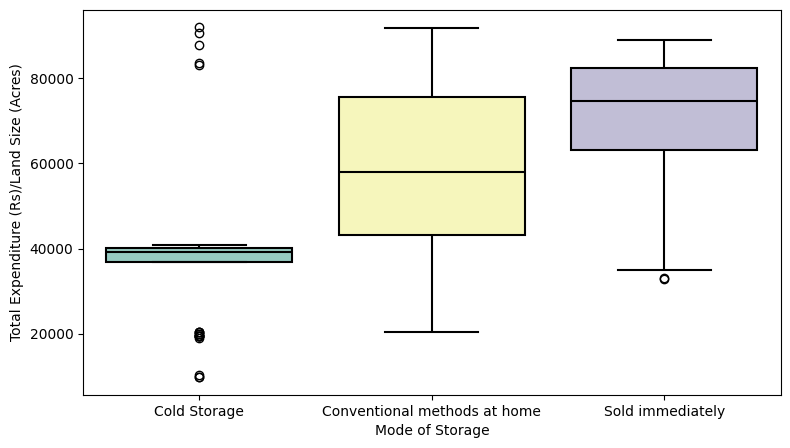

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="Mode of Storage", y="Normalised Expenditure", hue="Mode of Storage",
            palette="Set3", linewidth=1.5, linecolor="black")
plt.ylabel("Total Expenditure (Rs)/Land Size (Acres)")
plt.xlabel("Mode of Storage")
plt.show()
plt.savefig("tot_exp_vs_storage.jpg")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## 1.1 Calculate the mean normalised expenditure

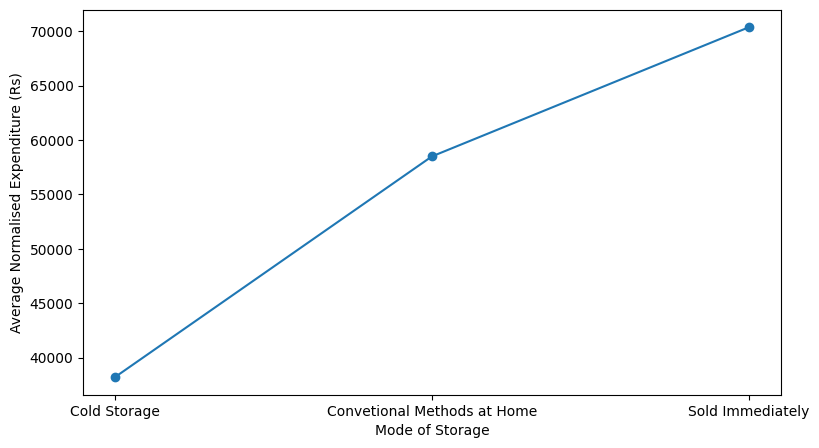

In [ ]:
# Calculate the mean normalised expenditure
mode_of_storage, mean_norm_exp = mean_normalised(df,'Normalised Expenditure')

# Plot
plt.figure(figsize=(9,5))
plt.plot(mode_of_storage, mean_norm_exp, marker='o')
plt.ylabel("Average Normalised Expenditure (Rs)")
plt.xlabel("Mode of Storage")
plt.show()

In [ ]:
mode_of_storage, mean_norm_exp

(['Cold Storage', 'Convetional Methods at Home', 'Sold Immediately'],
 [nan, nan, nan])

In [ ]:
m1 = mean_norm_exp[1] - mean_norm_exp[2]
m1/mean_norm_exp[2] * 100

2.6819454020211135

# 2. Total Income vs Mode of Storage

In [ ]:
norm_income = normalisation(df["Total Income"],  df["Land Size(Acres)"])
df.insert(len(df.columns),
          "Norm Income",
          norm_income)

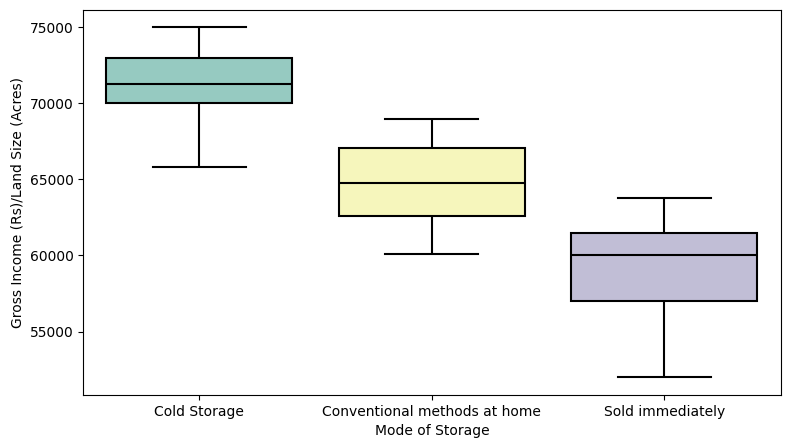

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="Mode of Storage", y="Normalised GI", hue="Mode of Storage",
            palette="Set3", linewidth=1.5, linecolor="black")
plt.ylabel("Gross Income (Rs)/Land Size (Acres)")
plt.xlabel("Mode of Storage")
plt.show()

## 2.1 Calculate the mean normalised income

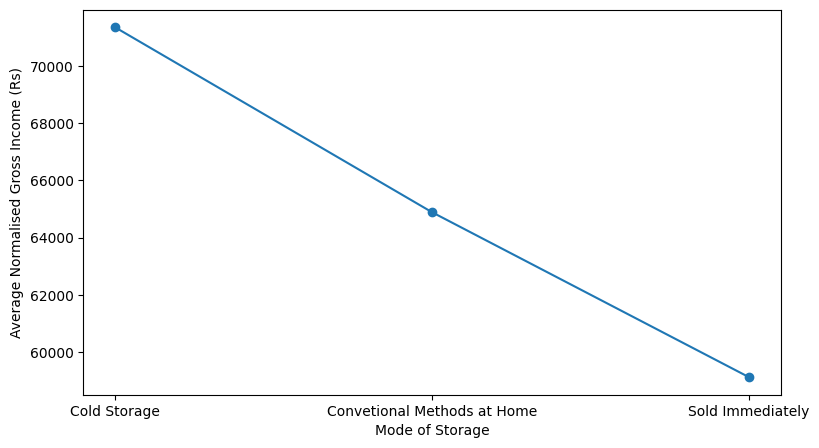

In [ ]:
# Calculate the mean normalised income
mode_of_storage, mean_norm_inc = mean_normalised(df,'Normalised GI')

# Plot
plt.figure(figsize=(9,5))
plt.plot(mode_of_storage, mean_norm_inc, marker='o')
plt.ylabel("Average Normalised Gross Income (Rs)")
plt.xlabel("Mode of Storage")
plt.show()

In [ ]:
m1 = mean_norm_inc[1] - mean_norm_inc[2]
m1/mean_norm_inc[2] * 100

9.753029255493466

# 3. Gross Income vs Mode of Storage

In [ ]:
norm_gross_income = normalisation(df["Gross Income"],  df["Land Size(Acres)"])
df.insert(len(df.columns),
          "Norm Gross Income",
          norm_gross_income)

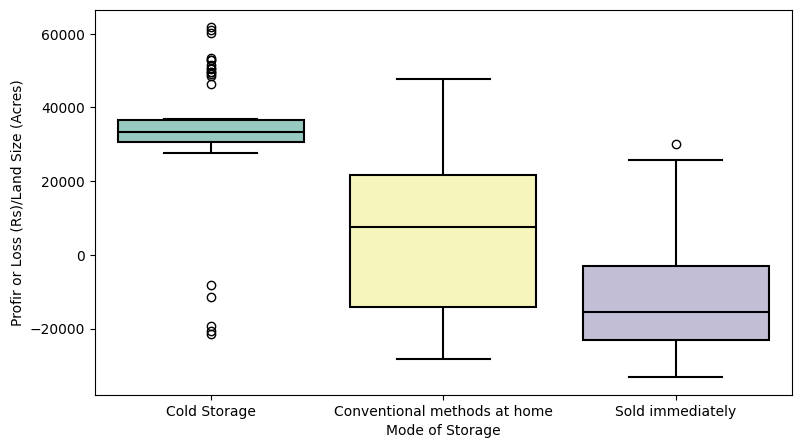

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="Mode of Storage", y="Normalised profit or loss", hue="Mode of Storage",
            palette="Set3", linewidth=1.5, linecolor="black")
plt.ylabel("Profir or Loss (Rs)/Land Size (Acres)")
plt.xlabel("Mode of Storage")
plt.show()

## 3.1 Calculate the mean normalised income

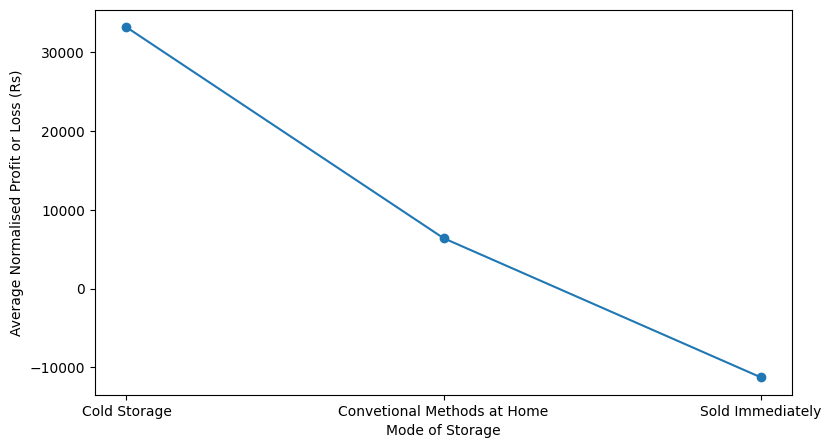

In [ ]:
# Calculate the mean normalised gross income
mode_of_storage, mean_norm_gi = mean_normalised(df,'Normalised profit or loss')

# Plot
plt.figure(figsize=(9,5))
plt.plot(mode_of_storage, mean_norm_gi, marker='o')
plt.ylabel("Average Normalised Profit or Loss (Rs)")
plt.xlabel("Mode of Storage")
plt.show()

In [ ]:
m1 = mean_norm_gi[0] - mean_norm_gi[2]
m1/mean_norm_gi[2] * 100

9.983592684510741

# Divided on land sizes

In [ ]:
# Find the values of land sizes in the data
df["Land Size(Acres)"].unique()

array([ 2.5 ,  1.  , 10.  ,  5.  ,  1.5 ,  2.  ,  4.  ,  0.5 ,  3.  ,
        3.5 ,  4.5 ,  0.25])

In [ ]:
# Find the mean for each land size wrt mode of storage used
unique_land_sizes = df["Land Size(Acres)"].unique()
mean_unls_mos = []
for i in unique_land_sizes:
  # print(i)
  for j in range(3):
    mean_unls_mos.append(df.loc[(df["Land Size(Acres)"] == i) & (df['Mode of Storage'] == j), 'Total Expenditure'].mean())
print(mean_unls_mos)
np.reshape(mean_unls_mos, (len(unique_land_sizes),3))

[217481.25, 214350.0, 213125.0, 89800.0, 85950.0, 85937.5, 877700.0, nan, nan, 434518.1818181818, nan, nan, nan, 130582.14285714286, 128375.0, nan, 172116.66666666666, nan, nan, 352850.0, nan, nan, 45023.07692307692, 41777.77777777778, nan, 250850.0, nan, nan, 301100.0, nan, nan, 406850.0, nan, nan, nan, 21100.0]


array([[217481.25      , 214350.        , 213125.        ],
       [ 89800.        ,  85950.        ,  85937.5       ],
       [877700.        ,             nan,             nan],
       [434518.18181818,             nan,             nan],
       [            nan, 130582.14285714, 128375.        ],
       [            nan, 172116.66666667,             nan],
       [            nan, 352850.        ,             nan],
       [            nan,  45023.07692308,  41777.77777778],
       [            nan, 250850.        ,             nan],
       [            nan, 301100.        ,             nan],
       [            nan, 406850.        ,             nan],
       [            nan,             nan,  21100.        ]])

In [ ]:
unique_land_sizes[4:]

array([1.5 , 2.  , 4.  , 0.5 , 3.  , 3.5 , 4.5 , 0.25])

In [ ]:
# Average land holdings [0] with cooling units, [1] without cooling units
np.mean(unique_land_sizes[:4]), np.mean(unique_land_sizes[4:])

(4.625, 2.40625)

# 4. Cost benefit Analysis

In [ ]:
mean_norm_exp, mean_norm_inc

([87253.38983050847, 87369.50029394471, 85087.5],
 [71352.71186440678, 64887.5, 59121.375])

In [ ]:
m2 = mean_norm_exp[2] - mean_norm_inc[2]
m2/mean_norm_exp[2] * 100

30.51696782723667

# 5. Find the correlation between gross income and other variables

I think it is best to separate them based on the **Mode of Storage** parameter.

In [ ]:
df.tail(5)

,Land Size(Acres),Mode of Storage,Educational Qualification,Occupation(Secondary),Duration between harvest and business (weeks),Total Income,Total Expenditure,Gross Income,Norm Expenditure,Norm Income,Norm Gross Income
148,0.50,2,0,1,0.0,31875.0,44000.0,75875,88000.0,63750.0,151750.0
149,0.50,2,0,1,0.0,29725.0,41250.0,70975,82500.0,59450.0,141950.0
150,0.25,2,0,1,0.0,15000.0,21250.0,36250,85000.0,60000.0,145000.0
151,0.50,2,0,1,0.0,31875.0,41750.0,73625,83500.0,63750.0,147250.0
152,0.25,2,0,1,0.0,15000.0,20750.0,35750,83000.0,60000.0,143000.0


In [ ]:
mean_value = []
for i in ['Cold Storage', 'Conventional methods at home', 'Sold immediately']:
  mean_value.append(df.loc[df['Mode of Storage'] == i, 'Normalised Expenditure'].mean())

In [ ]:
mean_value

[38207.60657421675, 58493.1850967962, 70361.8210955711]